# Part II - (Loan Data Exploration from Prosper)
## by (Ngwe Becky)



## Investigation Overview

In this in this investigation, the following was figured out:
* The factors which can be used to predict default on credit.
* What factors influence Prosper ratings.

## Dataset Overview

This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
base_color = sns.color_palette()[0]

## Wrangling

In [4]:
target_columns = [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]
target_df = df[target_columns]
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

## Loan Status

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

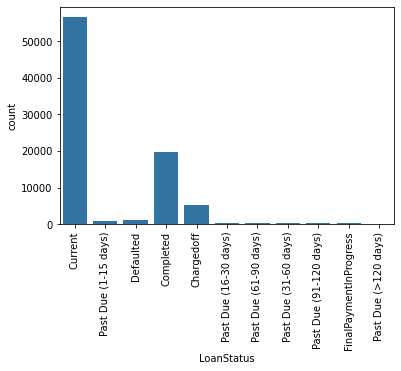

In [5]:
plt.xticks(rotation= 90)
sns.countplot(data= target_df, x= 'LoanStatus', color= base_color)

## Employment Status

Observation 2:
* The majority of borrowers are employed and all other categories as small part of borrowers. 
* In small Group full time has highest, after that self empolyed are there and so on.

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

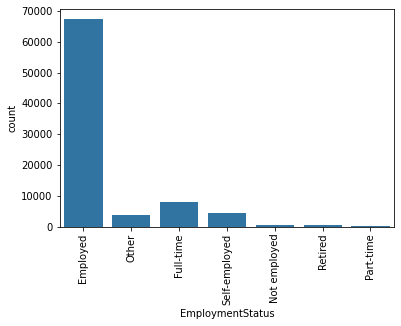

In [6]:
plt.xticks(rotation= 90)
sns.countplot(data=target_df, x= 'EmploymentStatus', color= base_color)

## Stated Monthly Income

Observation 3:
* With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000. 

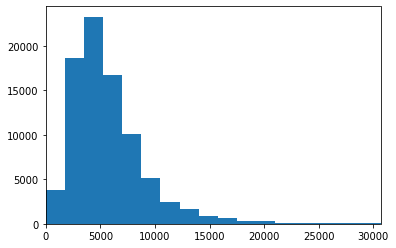

In [7]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
#len(target_df[target_df['StatedMonthlyIncome'] >= boundary])
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

In [8]:
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categorie, axis=1)

## Status and Prosper Rating:
**Observation 1:**
* The `most frequent` rating among defaulted loans is actually `D`.
* And the `most frequent` rating among Completed is also ` D ` and second highest is A and so on.

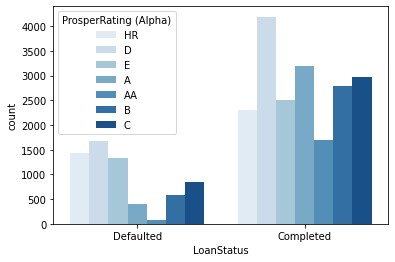

In [9]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues');

## Credit Start with Listing Category:
**Observation 2:**
* In both of the Graphs the `debt Consolidation` have `most frequency among all of them`.

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

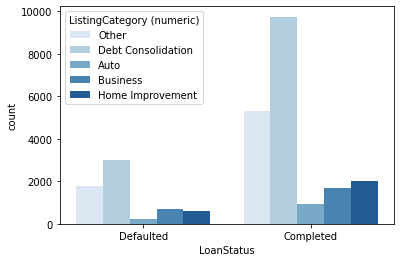

In [10]:
sns.countplot(data= target_df, x= 'LoanStatus', hue= 'ListingCategory (numeric)', palette= 'Blues')

## Loan Status and Loan Amount
**Observation 3:**
* As from Above Graph we can state that `defaulted credits` tend to be `smaller` than `completed credits` onces. 

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

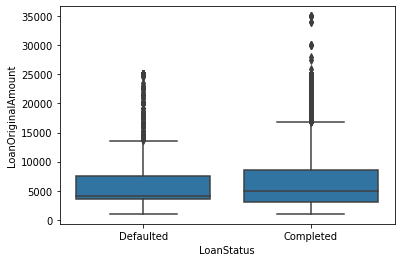

In [11]:
sns.boxplot(data= target_df, x= 'LoanStatus', y= 'LoanOriginalAmount', color= base_color)

## Prosper Rating and Employment Status
**Observation 4:**
* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

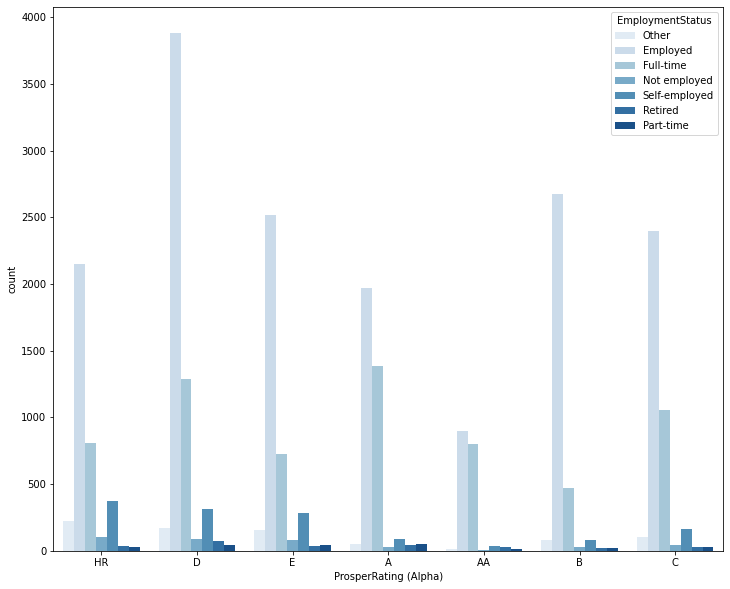

In [12]:
plt.figure(figsize=[12, 10])
sns.countplot( data= target_df, x= 'ProsperRating (Alpha)', hue= 'EmploymentStatus', palette= 'Blues')

## Rating, Loan Amount and Loan Status
**Observation 1:**
* Except for the lowest ratings defaulted credits tend to be larger than completed.
* Most of the defaulted credits comes from individuals with low Prosper rating.

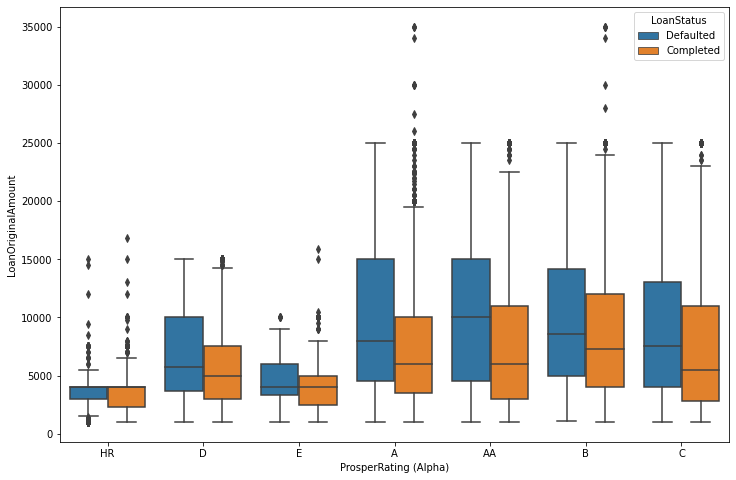

In [13]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

## Relationships between Credit category, Credit rating and outcome of Credit.
**Observation 2:**
* There are 5 graphs in the second one has much up and downs in it other than all of them.
* There is no substantial difference for default rates in different categories broken up by ratings.

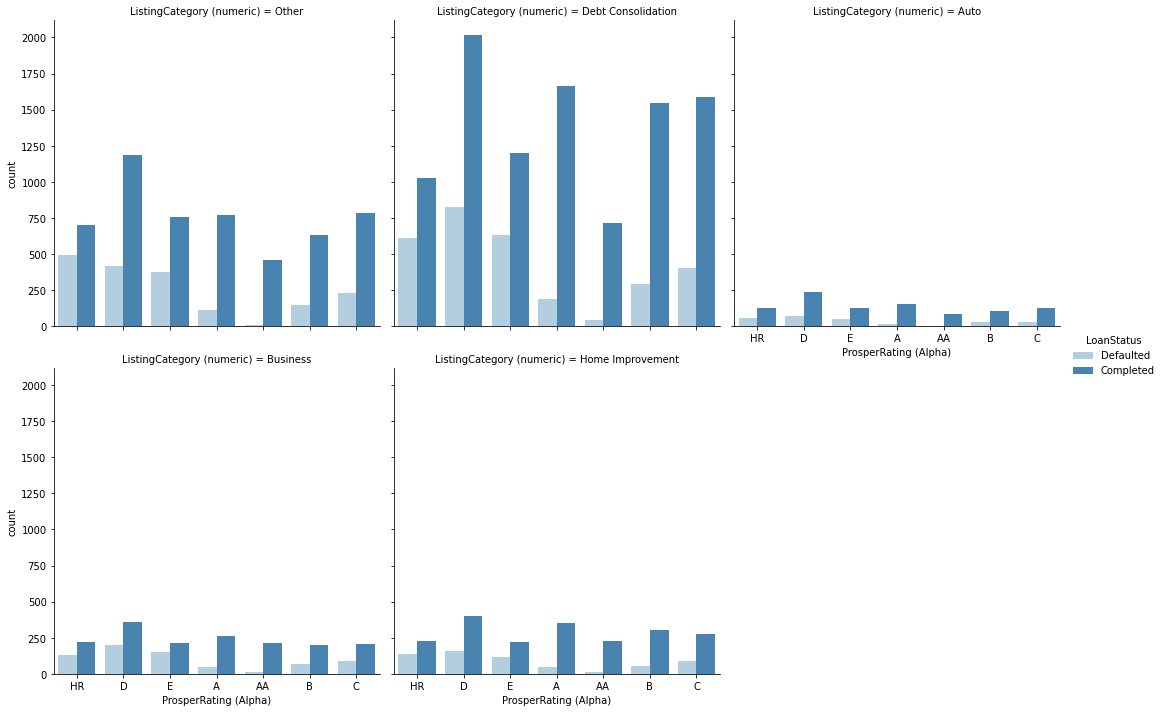

In [14]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

## Amount, Listing Category Loan and Loan Status Interact
**Observation 3:**
*  Except for Auto, Business and Home Improvemrnt dont have nearly equal mean amoong all of them.
*  Business category tend to have larger amount.

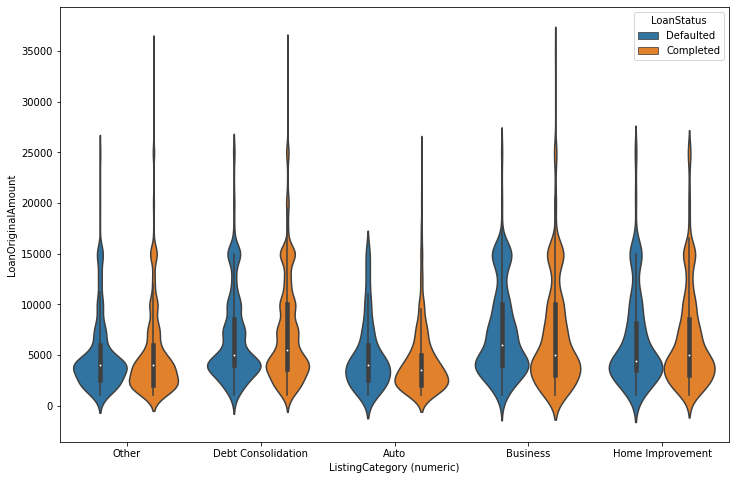

In [15]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');